<a href="https://colab.research.google.com/github/yebyyy/Reproduce-GPT2/blob/main/GPT2_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load GPT2 model

Load the GPT2 Transformer model through hugging face transformers

In [4]:
from transformers import GPT2LMHeadModel

In [6]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')  # Initializing the 124M model
sd_hf = model_hf.state_dict()  # Extracting the model parameters

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 


```
transformer.wte.weight torch.Size([50257, 768])
```
wte means the weight for token embedding (the vocabulary), in other words the lookup table for tokens, has 50257 tokens in it and each of them has 768 dimension embedding.

```
transformer.wpe.weight torch.Size([1024, 768])
```
wpe is the look up table for positions, and GPT2 has a maximum sequence length of 1024, each of the positions are also encoded into a 768 dimensional embedding.

plot the positional embedding

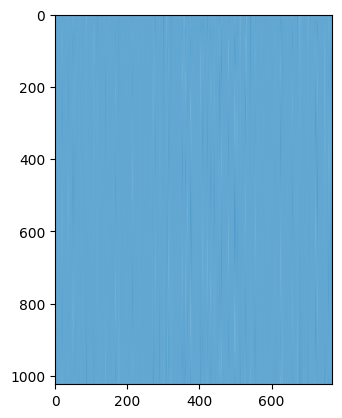

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="Blues")

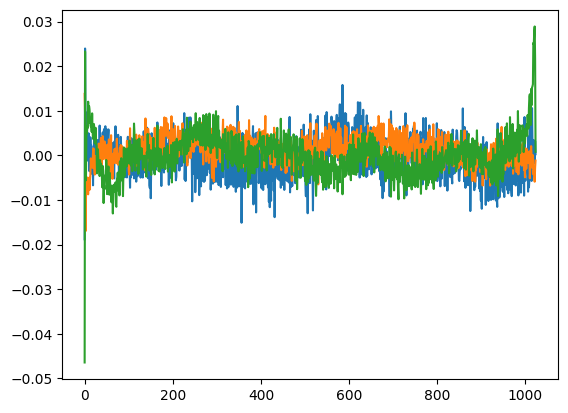

In [16]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 0])
plt.plot(sd_hf["transformer.wpe.weight"][:, 100])
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])

Not pretty smoothed out, meaning that the model isn't fully trained.

Note that the position embedding is initialized completely random, opposite of the original [Attention is all you need paper](https://arxiv.org/pdf/1706.03762), which has fixed positional embedding, OpenAI GPT2's positional embeddings are just trainable parameters.

In [17]:
from transformers import pipeline, set_seed
set_seed(42)
generator = pipeline('text-generation', model="gpt2")
generator("Hello, I'm a Language Model,", max_length=30, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a Language Model, but what I'm really being warned about isn't that I'm writing something with any of that kind of power"},
 {'generated_text': 'Hello, I\'m a Language Model, not a Programmer!" and he says, "No, I\'ve done my job." Well, I guess'},
 {'generated_text': "Hello, I'm a Language Model, and I'll do it in no time!\n\nOne of the things we learned from speaking with my classmates"},
 {'generated_text': "Hello, I'm a Language Model, not a Programming Language, but you're not my code.\n\nI was wondering if the concept could be"},
 {'generated_text': "Hello, I'm a Language Model, I've been using Language Models all my life. This is my first time building a language model, and it"}]